In [1]:
import numpy as np
import spec_flats as sf

## Initialize butler and set up observation year to find flats 

In [2]:
flat_dates, flat_ids, butler = sf.find_flat_dates(obs_year=2023)

In [3]:
flat_dates

array([20230112, 20230116, 20230118, 20230214, 20230321, 20230327,
       20230404, 20230420, 20230425, 20230509, 20230510, 20230523,
       20230524, 20230525, 20230705, 20230706, 20230724, 20230725,
       20230726, 20230727, 20230801, 20230802, 20230803, 20230811,
       20230816, 20230817, 20230823, 20230829, 20230830, 20230911,
       20230912, 20230913, 20230921, 20230926, 20230927, 20231003,
       20231010, 20231011])

In [4]:
#flat_ids

### Find closest date 

In [5]:
closest_date, closest_ids = sf.find_closest_date(20230116,flat_ids)

Requested observation date =  20230116
Closest date available =  20230116
Corresponding flat IDs =  [2023011600014 2023011600015 2023011600016]


### Check that the flats of a given date can be loaded 

In [6]:
sf.check_flats(closest_ids,return_flats=False,butler=butler)

Inspecting flats


/home/m/monroy/repos/repos_w_2023_35/spec_flats/spec_flats.py:136: UserWarning: Reading file:///tmp/tmpnxe7_g2g.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="white", physical="empty~empty")).  This is probably a bug in the code that produced it.
  flat_img_ = butler.get(obs_type,instrument=cameraName, exposure=iflat_, detector=detector, collections=calibCollections)
/home/m/monroy/repos/repos_w_2023_35/spec_flats/spec_flats.py:136: UserWarning: Reading file:///tmp/butler-cache-dir-xrkekxly/exempt/50c82d3e-e311f5dc-5763-4be5-9d15-4afc28415ac7.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="white", physical="empty~empty")).  This is probably a bug in the code that produced it.
  flat_img_ = butler.get(obs_type,instrument=cameraName, exposure=iflat_, detector=detector, c

All flats are equal


/home/m/monroy/repos/repos_w_2023_35/spec_flats/spec_flats.py:136: UserWarning: Reading file:///tmp/butler-cache-dir-xrkekxly/exempt/8918e818-e311f5dc-5763-4be5-9d15-4afc28415ac7.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="white", physical="empty~empty")).  This is probably a bug in the code that produced it.
  flat_img_ = butler.get(obs_type,instrument=cameraName, exposure=iflat_, detector=detector, collections=calibCollections)


### Select a flat by ID and plot it 

In [34]:
flat_id0 = 2023011600014

In [8]:
flat_array_ = sf.get_flat_array(flat_id0,butler=butler)

Flat 2023011600014 properly loaded


/home/m/monroy/repos/repos_w_2023_35/spec_flats/spec_flats.py:218: UserWarning: Reading file:///tmp/butler-cache-dir-xrkekxly/exempt/2fef58e7-e311f5dc-5763-4be5-9d15-4afc28415ac7.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="white", physical="empty~empty")).  This is probably a bug in the code that produced it.
  flat_img_ = butler.get(obs_type,instrument=cameraName, exposure=flat_id, detector=detector, collections=calibCollections)


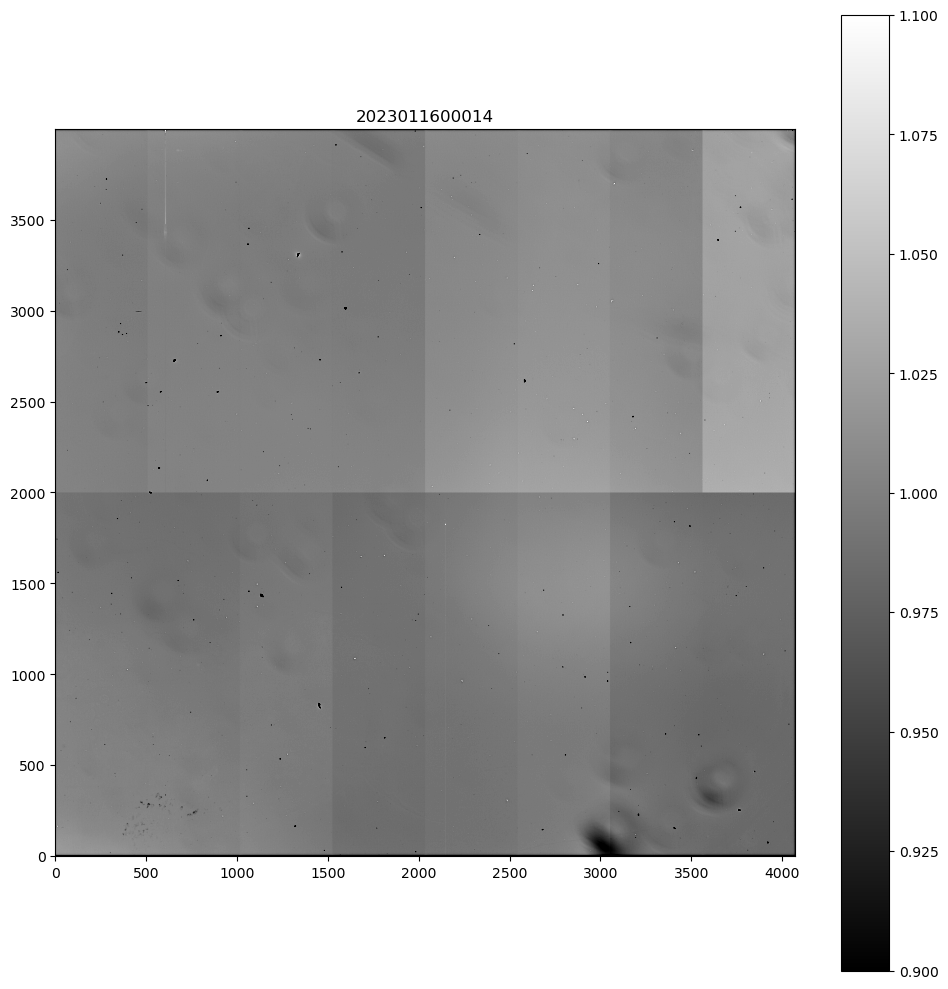

In [9]:
sf.plot_flat(flat_array_,title=flat_id0)

## Now we use the auxtel_flat class 

### We create an auxtel_flat object for a given flat ID 
We can reuse the butler that we initialized above or set up a different one 

In [10]:
myflat = sf.auxtel_flat(flat_id0,butler=butler)

/home/m/monroy/repos/repos_w_2023_35/spec_flats/spec_flats.py:489: UserWarning: Reading file:///tmp/butler-cache-dir-xrkekxly/exempt/00c493cb-e311f5dc-5763-4be5-9d15-4afc28415ac7.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="white", physical="empty~empty")).  This is probably a bug in the code that produced it.
  self.flat_img = self.butler.get(self.obs_type,instrument=self.cameraName, exposure=flat_id, detector=self.detector,collections=self.calibCollections)


In [11]:
myflat.flat_array

array([[0.71503717, 0.7065892 , 0.7060179 , ..., 0.69218045, 0.6967433 ,
        0.70996994],
       [0.8190593 , 0.82386637, 0.82650775, ..., 0.79544336, 0.79898745,
        0.7833576 ],
       [0.8544691 , 0.8682942 , 0.8733994 , ..., 0.8334802 , 0.83591735,
        0.8123437 ],
       ...,
       [0.85118276, 0.8610584 , 0.86854994, ..., 0.8757088 , 0.8593312 ,
        0.8444993 ],
       [0.8072019 , 0.8135052 , 0.818893  , ..., 0.82947433, 0.834638  ,
        0.81395483],
       [0.7106615 , 0.7088281 , 0.7078167 , ..., 0.72473973, 0.7244746 ,
        0.74156797]], dtype=float32)

### Plot flat with plot_flat() method 

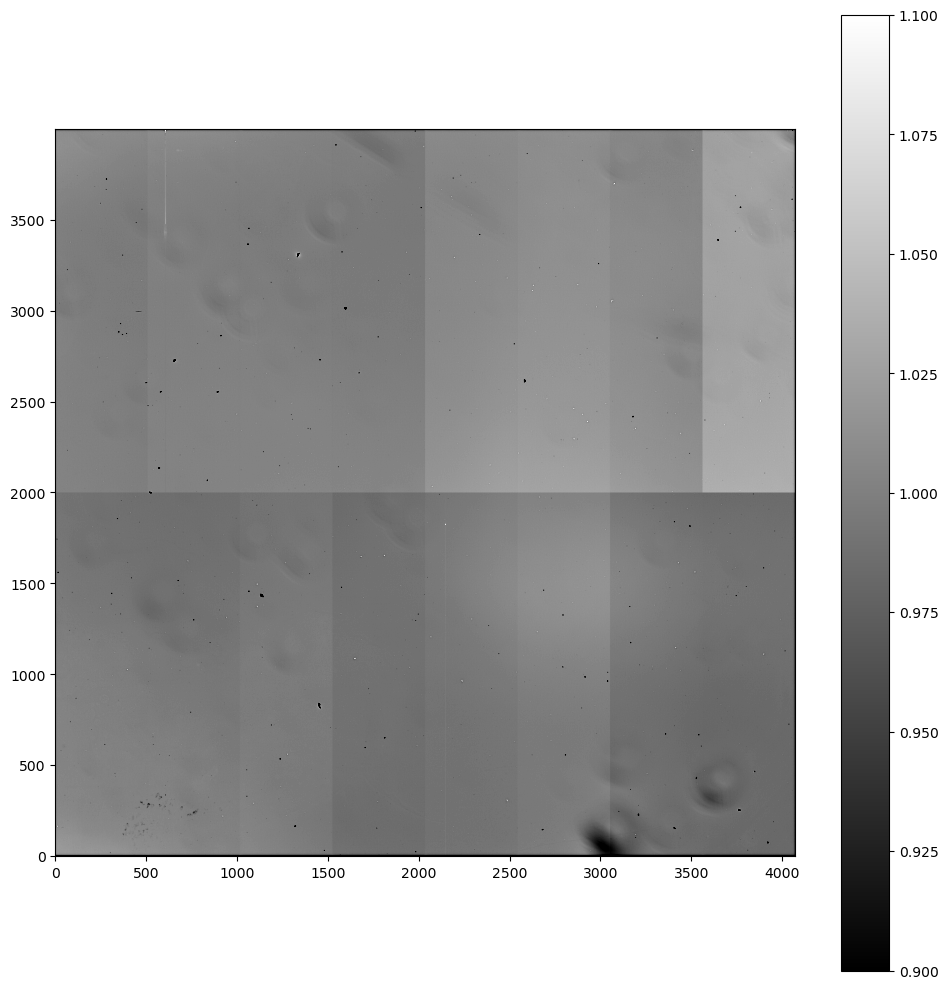

In [12]:
myflat.plot_flat()

### Check some atributes of the auxtel_flat object 

In [13]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [14]:
myflat.amplis_coords

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [15]:
myflat.amplis

array(['10', '11', '12', '13', '14', '15', '16', '17', '07', '06', '05',
       '04', '03', '02', '01', '00'], dtype='<U2')

### Now we select our implifiers of interest 

In [16]:
myflat.select_amplis(['C03','C13'])

In [17]:
myflat.amplis

['C03', 'C13']

In [18]:
myflat.amplis_coords

{'C03': (1527, 2036, 0, 2000), 'C13': (1527, 2036, 2000, 4000)}

In [19]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

### We create a reduced or *cut* version of the original flat 

In [20]:
myflat.cut_flat_array()

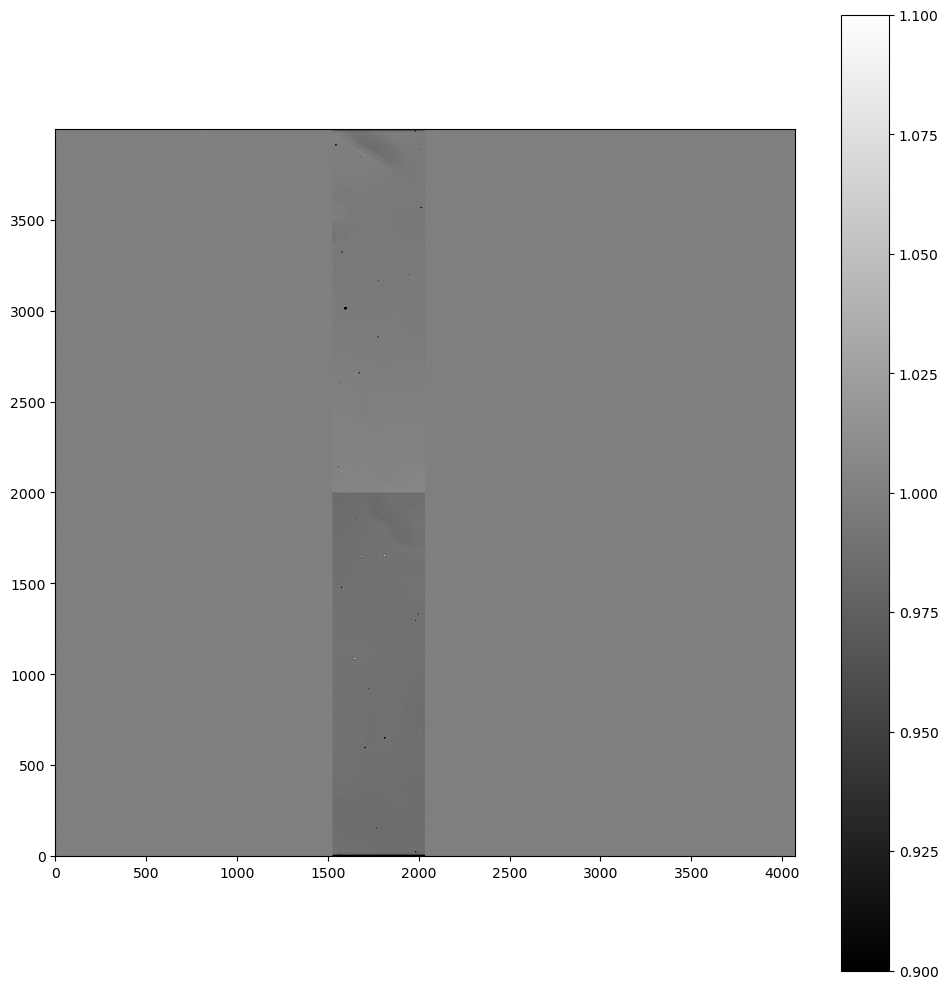

In [21]:
sf.plot_flat(myflat.cut_array)

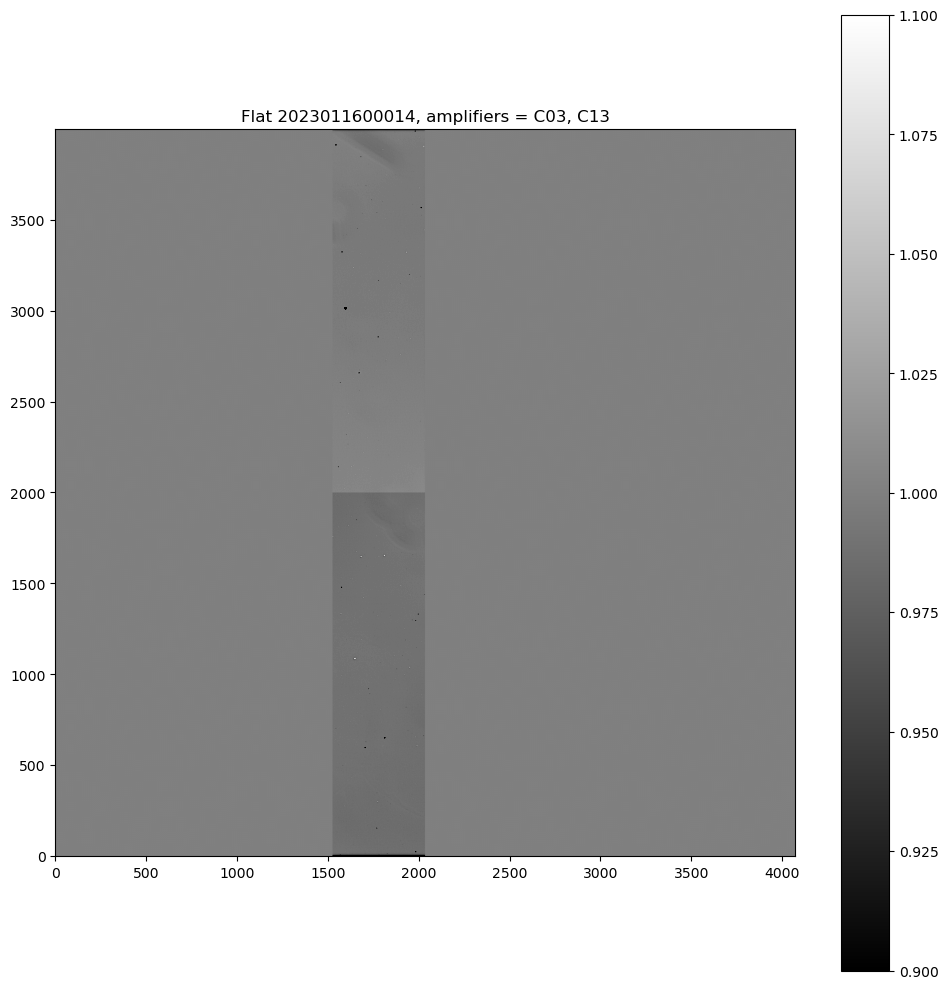

In [22]:
myflat.plot_flat(show='cut_flat')

### We can also normalize the flat 

Each amplifier is normalized by its median separately 

In [23]:
myflat.normalize_flat()

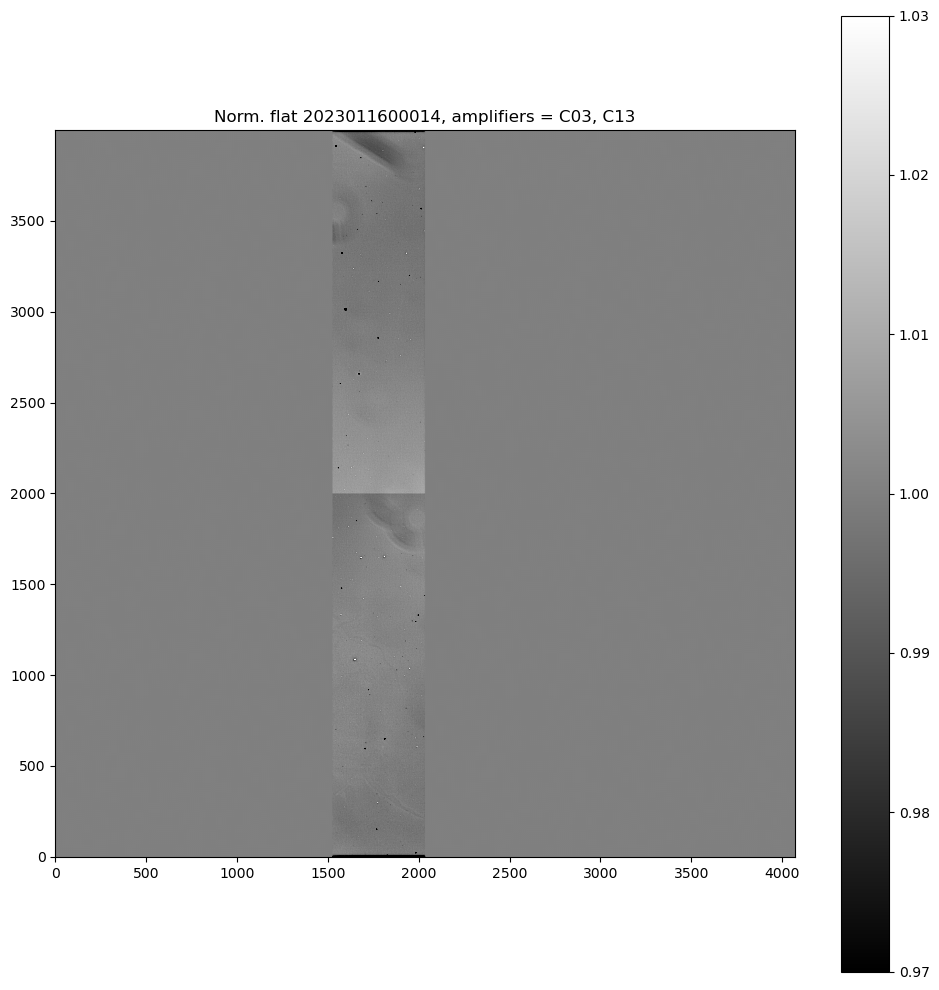

In [24]:
myflat.plot_flat(show="norm",vmin=0.97,vmax=1.03)

Some tests 

In [25]:
(myflat.cut_array==myflat.norm_array).all()

False

In [26]:
myflat.amplis_coords

{'C03': (1527, 2036, 0, 2000), 'C13': (1527, 2036, 2000, 4000)}

In [27]:
x0_ = myflat.amplis_coords['C03'][0]
x1_ = myflat.amplis_coords['C03'][1]
y0_ = myflat.amplis_coords['C03'][2]
y1_ = myflat.amplis_coords['C03'][3]
print(np.median(myflat.cut_array[y0_:y1_,x0_:x1_]))
print(np.median(myflat.norm_array[y0_:y1_,x0_:x1_]))

0.9877176880836487
1.0


In [28]:
type(myflat.flat_img)

lsst.afw.image._exposure.ExposureF

### We can also create a smoothed flat 

This is independent of the normalizing step, that is, we can do it even if we haven't done myflat.normalize_flat(), it will be done internally by default (normalize = True, very fast operation) 

In [29]:
myflat.smooth_flat(window_size=40)

Window size for smoothing window =  40
ATTENTION: scipy.signal.medfilt2d does not like even numbers. Setting window_size = 41
Window size for median smoothing = 41


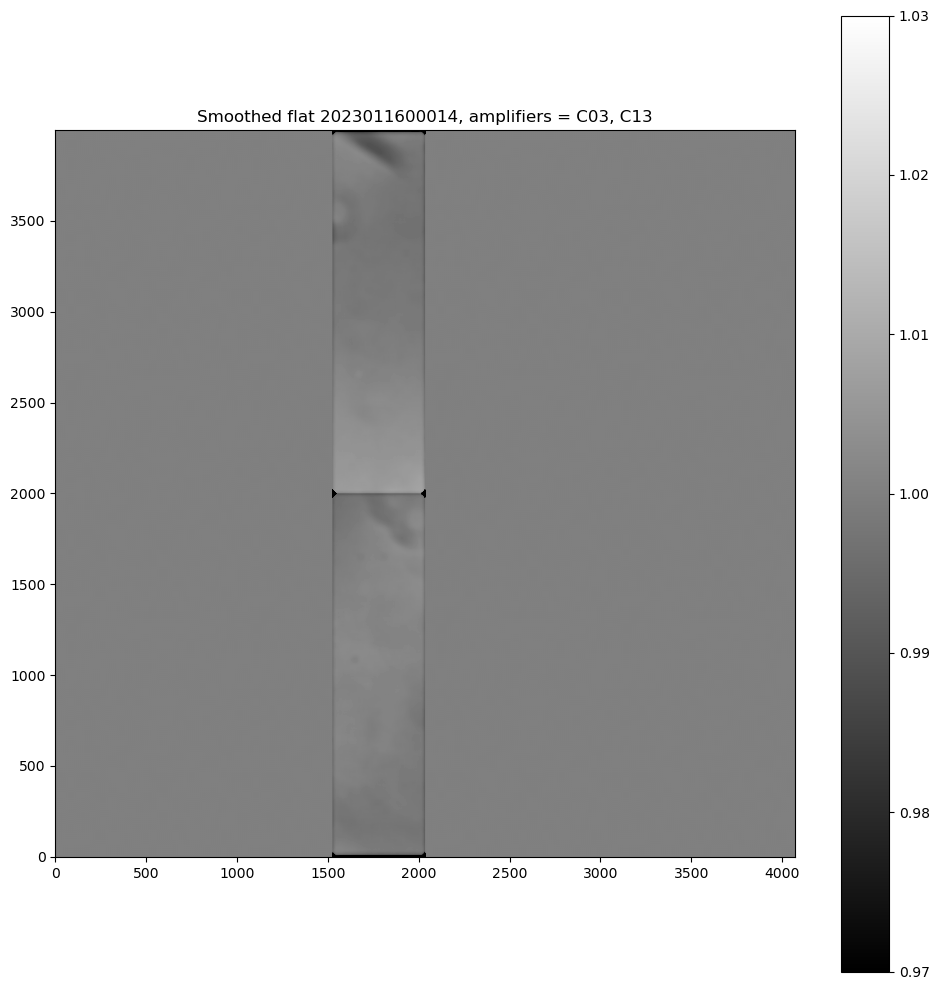

In [30]:
myflat.plot_flat(show="smooth",vmin=0.97,vmax=1.03)

In [31]:
myflat.smooth_array

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### Finally, we can create a spectroscopy or *special* flat 

This is also independent of the steps above: if myflat.smooth_array was not generated with myflat.smooth_flat, it will be done internally 

In [32]:
myflat.special_flat()

Window size for smoothing window =  40
ATTENTION: scipy.signal.medfilt2d does not like even numbers. Setting window_size = 41
Window size for median smoothing = 41


/home/m/monroy/repos/repos_w_2023_35/spec_flats/spec_flats.py:404: RuntimeWarning: divide by zero encountered in divide
  special_array_[y0_:y1_,x0_:x1_] = flat_array_[y0_:y1_,x0_:x1_]/smooth_array_[y0_:y1_,x0_:x1_]


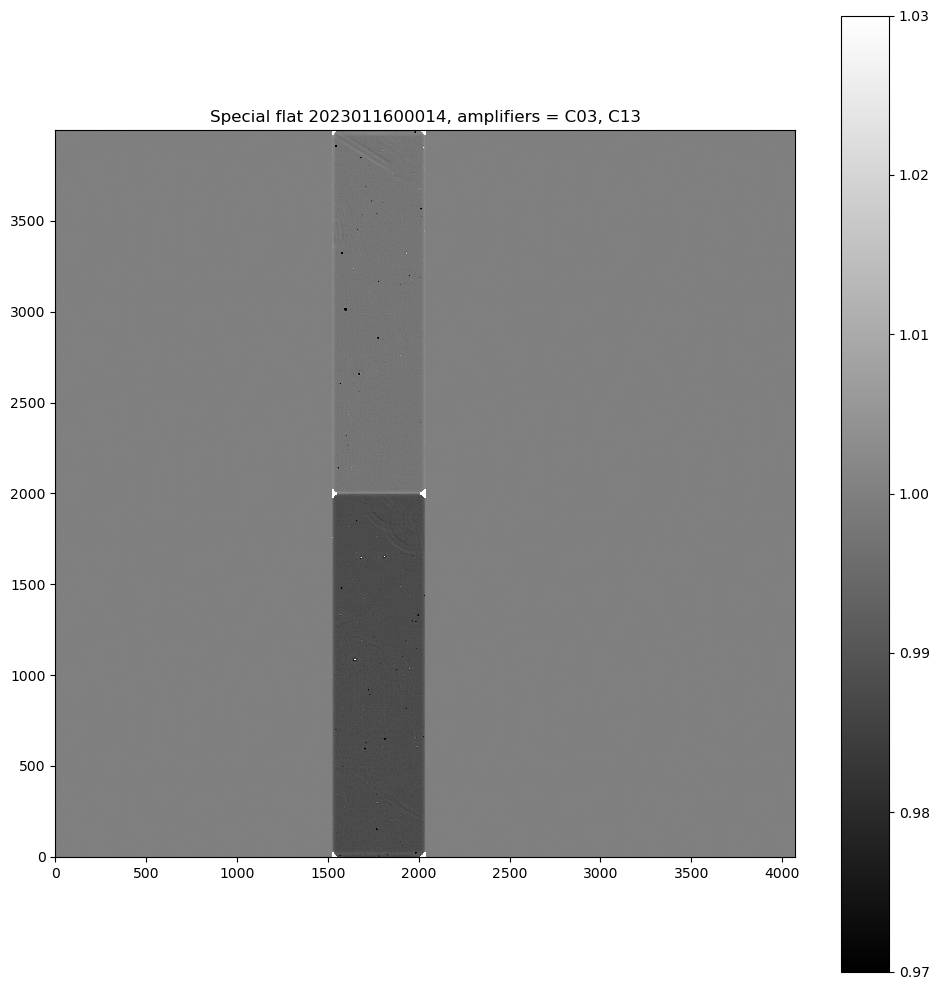

In [33]:
myflat.plot_flat(show="special",vmin=0.97,vmax=1.03)